# Simulated Heart Disease Data

***

## Introduction

One of the leading causes of sickness and mortality among the world's population is heart disease.[1] Heart disease is the top cause of death in the United States, according to the Centers for Disease Control and Prevention (CDC). Heart disease is responsible for almost 1 in every 4 deaths in the United States, and it affects people of all genders, races, and ethnicities.[2]

The most common type of heart disease is known as coronary heart disease. It occurs when the arteries that deleiver blood to the heart become blocked with plaque, which contains cholestrol, causing them to stiffen and narrow and as a result of this the blood supply reduces, and oxygen to heart reduces causing the heart muscle to weaken, increasing the chance of heart failure.[3]

Doctors have tried to forecast heart attacks since they first discovered them. However, because of multiple contributing risk factors such as diabetes, high blood pressure, excessive cholesterol, abnormal pulse rate, and many others, it can be difficult to detect cardiac disease.[1] Machine learning has shown to be useful in assisting in the decision-making and prediction of enormous amounts of data generated by the healthcare industry.[1] I'll be using one of the most widely used datasets, the Cleveland Heart Disease dataset from the UCI Repository, to use Machine Learning algorithms for determining whether a person has heart disease or not.

## Dataset Source
https://www.kaggle.com/ronitf/heart-disease-uci

## About the Dataset
Although there are 76 attributes in this database, all published studies only use a subset of 14 of them.[4]

Details of the dataset attributes are in the table below:[5]

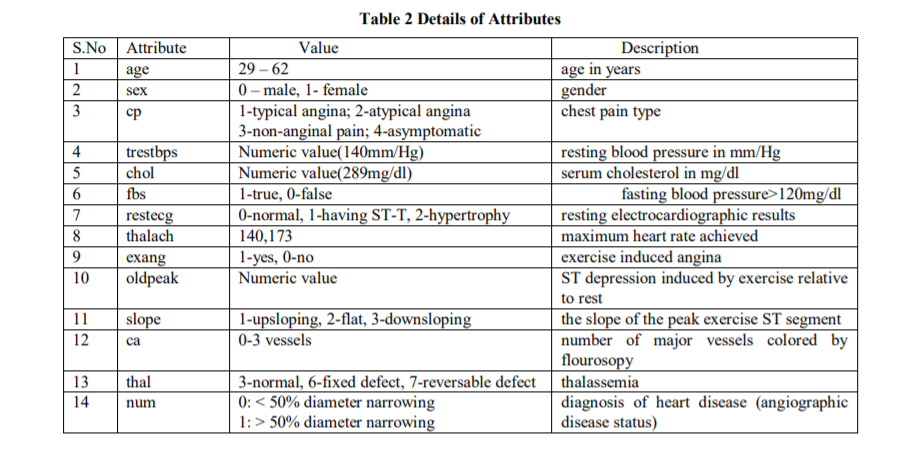

Not all of the characteristics are strongly linked to the prediction. 13 attributes were used (thal, ca, exang, oldpeak, thalach,
cp, slope, sex, age, restecg, trestbps, chol, fbs) to predict heart diseases.[5]



## Exploratory Data Analysis

### Understanding the data and how the different variables correlate together.

#### Age:
Heart failure affects up to one in every five people at some point in their lives and is linked with significant mortality and morbidity. People aged 65 and over bear the majority of the burden of heart failure.[6] After doing analysis using a Pivot table in Excel it would appear that age and heart disease are highly correlated. 

#### Sex:[7]

#### Chest Pain:[8]

#### Resting Blood Pressure:

High blood pressure (BP) is a major risk factor for cardiovascular disease (CVD), which is the leading cause of death wordwide. High blood pressure is responsible for around 54 percent of strokes and 47 percent of coronary heart disease.[9]

Blood pressure is divided into 4 categories. (Range 110 -180) trestbps[10]
Normal Blood pressure numbers of less than 120/80 mm Hg 
Elevated blood pressure is when readings consistently range from 120-129 systolic and less than 80 mm Hg diastolic. 
Hypertension Stage 1 is when blood pressure consistently ranges from 130-139 systolic or 80-89 mm Hg diastolic. 
Hypertension Stage 2 is when blood pressure consistently ranges at 140/90 mm Hg or higher. 
Hypertensive crisis -This stage of high blood pressure requires medical attention. If your blood pressure readings suddenly exceed 180/120 mm Hg, [10]

#### Cholesterol

The liver manufactures cholesterol and transports it throughout the body to be used in the creation of hormones and cell membranes. Low-density lipoproteins (LDL), also known as "bad cholesterol," are formed as cholesterol is carried through the bloodstream. Although LDL is required in small amounts (LDL transports cholesterol to various parts of the body), a high LDL cholesterol level increases the risk of a heart attack significantly.[11]

#### Fasting Blood Pressure

Fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.
[12]

#### Resting ECG

A resting ECG differs from a stress or activity ECG, as well as a cardiac imaging exam. If you have risk factors for heart disease, such as high blood pressure, or symptoms like palpitations or chest pain, you may need an ECG test.[13]

#### Maximum heart rate achieved

The maximum rate is calculated by subtracting your age from 220. The maximum heart rate for a 50-year-old is 220 minus 50, or 170 beats per minute. Your aim would be 50 percent of that maximum, or 85 beats per minute, at a 50 percent exercise level. Your goal heart rate would be 145 beats per minute at an exercise level of 85 percent. As a result, a 50-year-ideal old's heart rate during activity should be between 85 and 145 beats per minute.[14]

#### Exercise Induced Angina

Angina is chest pain that occurs as a result of exercise, stress, or other factors that cause the heart to pump harder. It's a very prevalent sign of coronary artery disease, which is caused by clogged coronary arteries with cholesterol. This is the artery network that feeds the heart muscle.[15]

####

####

####

#### Thalassemia

Thalassemia is a genetic blood condition in which your body produces much less hemoglobin than it should. Hemoglobin is a protein that allows red blood cells to transport oxygen. Thalassemia can induce anemia, which might make you tired. Severe anemia can cause organ damage and even death.[19]

### Libraries

In [1]:
import sklearn.neighbors as nei
import pandas as pd
import sklearn.model_selection as mod
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib.dates as mdates
import sqlite3

### Data

In [2]:
# Load the Health dataset csv file to a pandas dataframe
heart_data = pd.read_csv("HealthData.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Types

Individual data points can be classed as belonging to one of several statistical data categories in statistics, such as categorical data ("red", "blue", "green")[20] The data type determines which types of probability distributions can logically be used to represent the variable, the operations that can be performed on the variable, the type of regression analysis that can be used to predict the variable, and so on.[20]
The concept of data type is comparable to that of measurement level, however it is more specific: Count data, for example, require a different distribution (e.g., a Poisson or binomial distribution) than non-negative real-valued data, but both are measured at the same level (a ratio scale).[20]

### Level of Measurement
The nature of information within the values assigned to variables is described by the level of measurement or scale of measure, which is a categorization. [21] Stanley Smith Stevens, a psychologist, created the most well-known classification with four levels of measurement, or scales: nominal, ordinal, interval, and ratio.[21]

The table below categorizes the many simple data types, as well as their associated distributions, permitted operations, and so on. Because the theory of random variables typically explicitly assumes that they hold real numbers, all of these data types are generally coded using real numbers.[20]

### Age
Age is a count data type. Count data is statistical data in which the observations can only take the counting numbers, non-negative integer values 0 through 1, 2, 3, and so on, and where the integers come from counting rather than ranking.[22] A count variable is a term used to describe a single item of count data. The Poisson, binomial, and negative binomial distributions are often employed to illustrate the distribution of such a variable when it is handled as a random variable.[22]It has a ratio scale. The ratio type is named by the fact that measurement is the estimation of the ratio between a continuous quantity's magnitude and a unit of measurement of the same sort. Mass, length, duration, plane angle, energy, and electric charge are some examples. Ratios, unlike interval scales, can be compared by division. Many ratio scales can be loosely defined as indicating "how much" of something (i.e. an amount or magnitude). When expressing an order of magnitude, such as temperature in Orders of magnitude, a ratio scale is frequently employed.[23] The most typical ratio scale variables are age, money, and weight. For instance, if you are 50 years old and your child is 25, you may confidently declare that you are twice their age. Understanding the various measurement scales allows you to see the various types of data you can collect.[24]

#### Normal Distribution 

    numpy.random.normal
    
This function uses normal distribution, otherwise known as a bell curve, to select samples. 
The probability density function of the normal distribution was initially computed by De Moivre and later by both Gauss and Laplaceis. Its commonly referred as the bell curve because of its shape.[25]

In nature normal distributions are common. It represents for example the observed distribution of samples altered by 
by a large number of small random disturbances, each having its own unique distribution.

A normal (or Gaussian, Gauss, or Laplace–Gauss) distribution is a type of continuous probability distribution for 
a real-valued random variable in probability theory. The probability density function uses the following formula.[25]

![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)

The parameter mu represents the distribution's mean or expectation, whereas sigma represents its standard deviation. 
The distribution's variance is v. A normal deviate is a random variable that has a Gaussian distribution and is normally distributed.[26]

[76.72023691 60.56993168 57.92219449 50.6490479  56.37038612 53.55326451
 53.64367626 46.84518077 60.03088013 57.10968559 70.72508113 40.0339646
 49.54950454 50.67193162 58.61828764 59.6250147  47.30859908 49.86144205
 57.00391449 85.49525966 56.0338556  71.50535289 54.61678387 54.33839475
 64.84547453 51.26280498 54.39025018 60.71026285 59.54002696 56.26926593
 82.80873736 54.16633425 58.48665004 55.35998747 40.91834012 55.03879988
 58.16546745 55.69546735 56.1121423  44.04367229 59.66245827 60.19704943
 56.23345342 50.47736882 40.95062868 68.12612948 61.58466912 51.71450288
 66.12867844 53.97092913 42.1989998  52.30027373 54.54937047 51.84270941
 62.75916081 47.79188197 52.9859081  65.18062153 56.23125576 44.64630386
 55.64800154 50.18842013 62.05009407 47.45985323 41.26426079 57.46929788
 74.0794104  74.32496875 40.99159462 51.45221697 45.23015763 50.32046197
 63.54908055 35.69776465 35.18912042 50.37627111 58.05054143 57.99523158
 57.19712664 55.6031783  52.33615945 52.94373644 51.

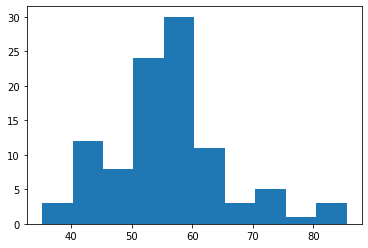

In [8]:
#Age - Normal Distribution

mu, sigma = 55, 10 # mean and standard deviation

s = np.random.normal(mu, sigma, 100)
s
print(s)
# Displaying Data
plt.hist(s)
plt.show()


###### *This is an example graph of Normal Distribution where we can see the data is dispersed from the median and has the shape of a bell curve*

### Sex
Sex is a binary data type as the output is either 'Yes' or 'No', that is, male or female.[27] It has a nominal scale. The nominal type distinguishes items or topics solely on the basis of their names, (meta-)categories, and other qualitative classifications to which they belong. The variables may be represented by numbers, but the numbers have no numerical value or relationship: for example, a globally unique identity.[27] A binary variable is a sort of random variable that has two possible values. A binomial distribution is used to describe the total counts of binary variables, or variables that are coded as 1 or 0.[27] 

#### Binominal Distribution

The discrete probability distribution of the number of successes in a series of n independent experiments, each asking a yes–no question and each with its own Boolean-valued conclusion, is the binomial distribution with parameters n and p.[28]

    numpy.random.binomial(n, p, size=None)

This function uses binomial distribution to select samples. Samples are taken from a bionomial distributuion with given parameters. n means number of trials/atttempts, p represents probability of succcess, and n must be an integer and greater or equal to 0. p must be in the interval of 0 to 1 [29]



[5 3 6 4 6 6 6 6 4 2 6 7 6 8 8 3 5 6 6 4 7 6 5 5 6 5 5 3 6 5 3 4 2 6 4 4 4
 2 5 4 5 4 9 7 6 4 4 4 5 4 6 3 3 4 6 4 4 3 4 5 6 4 4 2 5 2 5 5 3 6 7 5 5 5
 2 3 3 7 8 5 7 7 5 6 6 5 7 7 5 5 4 4 4 6 2 5 4 6 8 3]


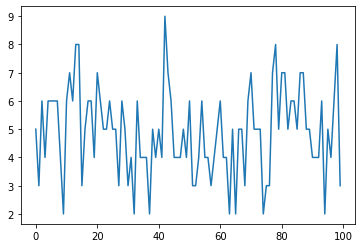

In [13]:
#Sex - Binominal Distribution

n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100)
print (s)

# Displaying Data
plt.plot(s)
plt.show()


In [14]:
###### *This a graph....*

In [ ]:
#restecg - Categorical Distribution

In [ ]:
#num

In [ ]:
#Synthesis Age data using Normal Distribution



### Visualise

In [ ]:
# Load the seaborn package
#import seaborn as sns
#mport matplotlib.pyplot as plt

# Plot the Iris dataset with a pair plot
#sns.pairplot(df)


In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['age'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("Age Groups",fontsize=40)
plt.ylabel("Age",fontsize=40)
plt.title("Distribution of ages", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()



In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['sex'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("Sex Groups",fontsize=40)
plt.ylabel("Sex",fontsize=40)
plt.title("Distribution of sex", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['chol'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("chol Groups",fontsize=40)
plt.ylabel("chol",fontsize=40)
plt.title("Distribution of cholestrol", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['thalach'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("thalach Groups",fontsize=40)
plt.ylabel("thalach",fontsize=40)
plt.title("Distribution of Maximum Heart Rate", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (50,25)
X = heart_data['trestbps'].to_numpy()


n, bins, patches = plt.hist(X, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel("trestbps Groups",fontsize=40)
plt.ylabel("trestbps",fontsize=40)
plt.title("Distribution of Resting Blood Pressure", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

### Inputs and Outputs

In [ ]:
inputs = heart_data['sex']
outputs = heart_data['chol']
print(inputs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(inputs, outputs)
plt.show()

In [ ]:
inputs = heart_data['age']
outputs = heart_data['chol']
print(inputs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(inputs, outputs)
plt.show()

In [ ]:
males = heart_data.query("sex == 1").reset_index()

print(heart_data['chol'].corr(males['age']))

In [ ]:

males = heart_data.loc[heart_data['sex'] == 1]

males 

inputs = males['age']
outputs = heart_data['chol']
print(inputs)
testdata = pd.concat([inputs, outputs]).reset_index()

testdata



In [ ]:

inputs = males['age']
outputs = heart_data['chol']
print(inputs)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(inputs, outputs)
plt.show()

In [ ]:
knn = nei.KNeighboursClassifier(n_neighbors=5)

### Fit

In [ ]:
knn.fit(inputs, outputs)

### Predict

In [ ]:
## df.loc[0]

In [ ]:
## knn.predict([[5.1, 3.5, 1.4, 0.2]])

## Evaluate

In [ ]:
(knn.predict(inputs) == outputs).sum()

In [ ]:
## inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
##inputs_train

In [ ]:
## knn = nei.KNeighborsClassifier(n_neighbors=5)
## knn.fit(inputs_train, outputs_train)

In [ ]:
##(knn.predict(inputs_test) == outputs_test).sum()

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_tests = mod.train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

In [ ]:
knn.predict(inputs_test) == outputs_test

</br>

## Time Series

In [ ]:
df = pd.read_csv(enter csv file, skiprows=23, low_memory=False, nrows=1000)

In [ ]:
df['datetime'] = pd.to_datetime(df['date'])

In [ ]:
df

In [ ]:
sns.lineplot(x="datetime", y="temp", data="df[1]")

In [ ]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')

In [ ]:
ts = pd.DataFrame(np.random.poisson(5, len(rng)), index=rng, columns=["admissions"])

In [ ]:
ts

In [ ]:
np.random.poisson(5, 10)

# Time Series Meet Eireann Data

In [ ]:
df = df = pd.read_csv(enter csv file, skiprows=23, low_memory=False, nrows=1000)

In [ ]:
df['datetime'] = pd.to_datetime(df['date'])

In [ ]:
df

In [ ]:
%matplotlib inline

#Plot the temperature over time - import matplotlib.dates as mdates - yu'll need seaborn and plplot too

sns.set(styles="darkgrid")

fig, ax = plt.subplots()

sns.lineplot(x="datetime", y="temp", data=df[1:], ax=ax)

# Makes the x axis display well
#  See: https://stackoverflow.com/a/31262531/340324

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

plt.show()


# Ceating Time Series

In [ ]:
# Create a datetime index for a data frame.

# Adapted from: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# 72 hours starting with midnight Jan 1st, 2011
rng = pd.date_range('1/1/2011', periods=72, freq='H')

In [ ]:
rng

### Statistical Bias

In [ ]:
plt.style.use('ggplot')
plt.rcParams

In [ ]:
plt.title("Normal Distributin for different $\mu and $\sigma")
plt.legend 

In [ ]:
# Simulate some hospital admissions data using numpy, using our datetime index.

import numpy as np
ts = pd.DataFrame(np.random.poisson(10, len(rng)), index=rng, columns=["admissions"])

In [ ]:
ts

## Accessing and grouping

In [ ]:
ts.mean()

In [ ]:
ts.loc['2011-01-0 00:00:00':'2011-01-0 23:00:00']

In [ ]:
ts.resample('D').mean()

# SQLLite in Python CREATE A DATABASE

In [ ]:
conn = sqlite.connect('enter filename')

In [ ]:
#We need a cursor to our database - ie where the charactes go - the interactive part of the database. Use sql code to interact with the database
c = conn.cursor()
#Create a table called ? and give it column names. ''' at each end allows you to expand inforamtion over more than one line - otherwise use single quotes'''
c.execute('''CREATE TABLE person(name text, address text)''')
conn.commit()

In [ ]:
c. execute("SELECT name FROM sqlite_master WHERE type='table'")
c.fetchall()

In [ ]:
c.execute("INSERT INTO person VALUES('Anna Henry', 'Carlow')")
conn.commit()

In [ ]:
c.execcute("SELECT = FROM person")
c.fetchall()

In [ ]:
c.execcute("SELECT name, address FROM person")
c.fetchall()

In [ ]:
person = [('shelby black', 'Tipperary'), ('Ann Grogan', 'Cork',)]

In [ ]:
person

In [ ]:
c.execcutemany("INSERT INTO person VALUES (?, ?"), person
conn.commit()

In [ ]:
c.execute("Select name, address FROM person")
c.fetchll()

In [ ]:
c.execute("DELETE FROM person WHERE ROWID=1")
conn.commit()

# pandas.dataframe.to_sql - instead of typing inrformation you can read the information from an excel file

In [ ]:
person.to_sql("person", conn)

In [ ]:
c.execute("SELECT = FROM person")
c.fetchall()

# cet info from anothe csv file

In [ ]:
car =pd.read_csv("csv file", index_col=0)
car.to.sql("car", conn)

In [ ]:
c.execute("SELECT = FROM car")
c.fetchall()

# NOW 3 tables in my database , person, car, county - take csv files read them into pandas and get pandas to stick them into SQLLite database - now run commands on this database

## References
1.  https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
2.  https://www.medicalnewstoday.com/articles/237191
3.  https://mendedhearts.org/story/the-future-of-heart-attack-prediction/
4.  https://www.kaggle.com/ronitf/heart-disease-uci
5.  https://www.ijrte.org/wp-content/uploads/papers/v8i2S3/B11630782S319.pdf
6.  https://www.bmj.com/content/372/bmj.n461
7.  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3362050/
8.
9.  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5059018/
10. https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
11. https://www.alliedacademies.org/cholesterol-and-heart-disease/
12. https://www.cdc.gov/diabetes/basics/getting-tested.html
13. https://choosingwiselycanada.org/ecg-electrocardiogram/
14. https://www.hopkinsmedicine.org/health/wellness-and-prevention/understanding-your-target-heart-rate
15. https://www.health.harvard.edu/heart-health/angina-symptoms-diagnosis-and-treatments

19. https://en.wikipedia.org/wiki/Thalassemia
20. https://en.wikipedia.org/wiki/Statistical_data_type
21. https://en.wikipedia.org/wiki/Level_of_measurement#Nominal_level
22. https://en.wikipedia.org/wiki/Count_data
23. https://en.wikipedia.org/wiki/Level_of_measurement#Ratio_scale
24. https://www.questionpro.com/blog/ratio-scale-vs-interval-scale/
25. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
26. https://en.wikipedia.org/wiki/Normal_distribution
27. https://en.wikipedia.org/wiki/Binary_data#Binary_variable
28. https://en.wikipedia.org/wiki/Binomial_distribution
29. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
 


[1]  https://scikit-learn.org/stable/
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://docs.python.org/3/library/datetime.html
https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
https://stackoverflow.com/questions/23853553/python-pandas-how-to-read-only-first-n-rows-of-csv-files-in/23853569
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.aggregate.html
https://docs.python.org/3/library/functions.html#int
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/